##  Crime Rates Dataset 
### Load the dataset via a URL

In [1]:
import pandas as pd
pd.options.display.float_format = "{:,.2f}".format

In [2]:
crime_rates = pd.read_csv('https://raw.githubusercontent.com/' +
                      'csbfx/advpy122-data/master/crime_rates.csv') 

### View some of the rows

In [3]:
crime_rates.head()

,State,Year,Population,Violent Crime Rate,Murder Rate,Forcible Rape Rate,Robbery Rate,Aggraveted Assault Rate,Property Crime Rate,Burglary Rate,Larceny & Theft Rate,Motor Vehicle Theft Rate
0,Alaska,1960,226167,104.30,10.20,20.80,28.30,45.10,"1,544.90",332.10,970.50,242.30
1,Alaska,1961,234000,88.90,11.50,13.20,12.40,51.70,"1,540.60",380.80,950.00,209.80
2,Alaska,1962,246000,91.50,4.50,18.70,13.80,54.50,"1,564.60",351.60,985.40,227.60
3,Alaska,1963,248000,109.70,6.50,14.90,22.20,66.10,"1,952.80",381.50,"1,213.70",357.70
4,Alaska,1964,250000,150.00,10.40,22.40,21.20,96.00,"2,016.00",443.60,"1,218.40",354.00


In [4]:
crime_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   State                     2200 non-null   object 
 1   Year                      2200 non-null   int64  
 2   Population                2200 non-null   int64  
 3   Violent Crime Rate        2200 non-null   float64
 4   Murder Rate               2200 non-null   float64
 5   Forcible Rape Rate        2200 non-null   float64
 6   Robbery Rate              2200 non-null   float64
 7   Aggraveted Assault Rate   2200 non-null   float64
 8   Property Crime Rate       2200 non-null   float64
 9   Burglary Rate             2200 non-null   float64
 10  Larceny & Theft Rate      2200 non-null   float64
 11  Motor Vehicle Theft Rate  2200 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 206.4+ KB


### Customize the column names

In [5]:
crime_rates.columns = ['state', 'year', 'pop', 'violent', 'murder', \
                       'rape', 'robbery', 'assault', 'property', \
                       'burglary', 'larceny','vehicle']

In [6]:
crime_rates.head(3)

,state,year,pop,violent,murder,rape,robbery,assault,property,burglary,larceny,vehicle
0,Alaska,1960,226167,104.30,10.20,20.80,28.30,45.10,"1,544.90",332.10,970.50,242.30
1,Alaska,1961,234000,88.90,11.50,13.20,12.40,51.70,"1,540.60",380.80,950.00,209.80
2,Alaska,1962,246000,91.50,4.50,18.70,13.80,54.50,"1,564.60",351.60,985.40,227.60


## Select data from DataFrame

### Select rows with specific column value

In [7]:
alaska_crimes = crime_rates[crime_rates['state']=='Alaska']
alaska_crimes.head(5)

,state,year,pop,violent,murder,rape,robbery,assault,property,burglary,larceny,vehicle
0,Alaska,1960,226167,104.30,10.20,20.80,28.30,45.10,"1,544.90",332.10,970.50,242.30
1,Alaska,1961,234000,88.90,11.50,13.20,12.40,51.70,"1,540.60",380.80,950.00,209.80
2,Alaska,1962,246000,91.50,4.50,18.70,13.80,54.50,"1,564.60",351.60,985.40,227.60
3,Alaska,1963,248000,109.70,6.50,14.90,22.20,66.10,"1,952.80",381.50,"1,213.70",357.70
4,Alaska,1964,250000,150.00,10.40,22.40,21.20,96.00,"2,016.00",443.60,"1,218.40",354.00


### Indexing in pandas
The indexing operator and attribute selection are nice because they work just like they do in the rest of the Python ecosystem. As a novice, this makes them easy to pick up and use. However, pandas has its own accessor operators, `iloc` and `loc`. For more advanced operations, these are the ones you're supposed to be using.

#### Index-based selection
Pandas indexing works in one of two paradigms. The first is index-based selection: selecting data based on its numerical position in the data.`iloc` follows this paradigm.

To select the first row of data in a DataFrame, we may use the following:

In [8]:
crime_rates.iloc[0] # first row

# python index
#[start:stop:skip] # stop is exclusive [1:3] --> index 1 & 2.
#[1::2, :] # from the 2nd row all the way to the end every other row, and all the columns
#[:, :3] # all rows, from the beginning to the 3rd column (0, 1, 2)

crime_rates.iloc[0:10:2, 3:5]

,violent,murder
0,104.30,10.20
2,91.50,4.50
4,150.00,10.40
6,150.40,12.90
8,175.50,10.50


Both `loc` and `iloc` are row-first, column-second. This is the opposite of what we do in native Python, which is column-first, row-second.

This means that it's marginally easier to retrieve rows, and marginally harder to get retrieve columns. To get a column with `iloc`, we can do the following:

In [9]:
crime_rates.iloc[:, 0] # all rows, first column

0        Alaska
1        Alaska
2        Alaska
3        Alaska
4        Alaska
         ...   
2195    Wyoming
2196    Wyoming
2197    Wyoming
2198    Wyoming
2199    Wyoming
Name: state, Length: 2200, dtype: object

On its own, the `:` operator, which also comes from native Python, means "everything". When combined with other selectors, however, it can be used to indicate a range of values. For example, to select the country column from just the first, second, and third row, we would do:

In [10]:
crime_rates.iloc[:3, 3:]

,violent,murder,rape,robbery,assault,property,burglary,larceny,vehicle
0,104.30,10.20,20.80,28.30,45.10,"1,544.90",332.10,970.50,242.30
1,88.90,11.50,13.20,12.40,51.70,"1,540.60",380.80,950.00,209.80
2,91.50,4.50,18.70,13.80,54.50,"1,564.60",351.60,985.40,227.60


#### Label-based selection
The second paradigm for attribute selection is the one followed by the loc operator: label-based selection. In this paradigm, it's the data index value, not its position, which matters.

In [11]:
crime_rates.loc[:, ['year', 'state', 'pop']]

,year,state,pop
0,1960,Alaska,226167
1,1961,Alaska,234000
2,1962,Alaska,246000
3,1963,Alaska,248000
4,1964,Alaska,250000
...,...,...,...
2195,1999,Wyoming,480000
2196,2000,Wyoming,493782
2197,2001,Wyoming,494423
2198,2002,Wyoming,498830


## Simple data analysis
Let's take a look at the crime rates in Alaska throughout the years.

In [12]:
# Select crimes data for state of Alaska
alaska_crimes = crime_rates[crime_rates['state']=='Alaska']
# Set the year as the index of the DataFrame
alaska_crimes_by_year = alaska_crimes.set_index('year')
alaska_crimes_by_year.head(5)

,state,pop,violent,murder,rape,robbery,assault,property,burglary,larceny,vehicle
year,,,,,,,,,,,
1960,Alaska,226167,104.30,10.20,20.80,28.30,45.10,"1,544.90",332.10,970.50,242.30
1961,Alaska,234000,88.90,11.50,13.20,12.40,51.70,"1,540.60",380.80,950.00,209.80
1962,Alaska,246000,91.50,4.50,18.70,13.80,54.50,"1,564.60",351.60,985.40,227.60
1963,Alaska,248000,109.70,6.50,14.90,22.20,66.10,"1,952.80",381.50,"1,213.70",357.70
1964,Alaska,250000,150.00,10.40,22.40,21.20,96.00,"2,016.00",443.60,"1,218.40",354.00


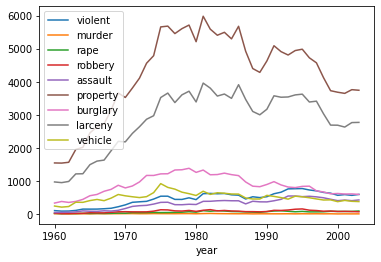

In [13]:
# Use iloc to select all rows and all the columns about crime rates
# Use plot.line() to create a line plot
lines = alaska_crimes_by_year.iloc[:,2:].plot.line()

## Your turn.
- Select data from crime_rates dataframe where state equals to "California" and year is between 1980 and 2003, inclusively. *Hint: Use `&` to combine two conditions*. 
- Create a line plot where the horizontal axis is year and vertical axis is the number of crime cases.

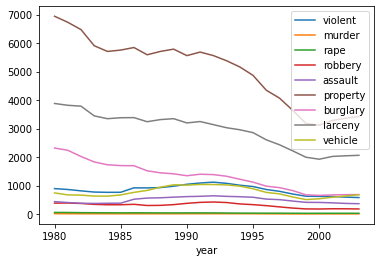

In [14]:
# Your code here . . .
california_crimes_80_03 = crime_rates[(crime_rates.state == 'California') & (crime_rates.year.between(1980, 2003, inclusive= True))]
california_crimes_80_03

#california_crimes_80_03.plot.line(x = 'year')
ca_crimes_by_year = california_crimes_80_03.set_index('year')
line = ca_crimes_by_year.iloc[:,2:].plot.line()


## It's still your turn ... to make another plot
* We can't clearly see the trends for the lines that are below 1000  on the y-axis. How about generate another plot, including data for all years, and excluse data for burglary, larceny, and property.

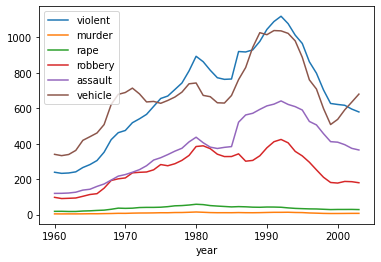

In [15]:
# Your code here . . . 
ca_crimes = crime_rates[crime_rates['state']=='California'].set_index('year')
#ca_crimes_around_1000 = ca_crimes.loc[:, ['violent',	'murder',	'rape',	'robbery','assault','vehicle']].plot.line()
ca_crimes_around_1000 = ca_crimes.drop(columns = ['burglary', 'larceny', 'property']).iloc[:,2:].plot.line()


In [20]:
ca_crimes

,state,pop,violent,murder,rape,robbery,assault,property,burglary,larceny,vehicle
year,,,,,,,,,,,
1960,California,15717204,239.00,3.90,18.20,97.30,119.60,"3,235.40",910.50,"1,984.80",340.10
1961,California,16397000,232.70,3.70,18.50,90.50,120.00,"3,177.50",894.20,"1,950.60",332.70
1962,California,16970000,234.80,3.90,17.40,91.90,121.70,"3,326.20",934.10,"2,052.90",339.20
1963,California,17590000,241.20,3.80,17.50,93.60,126.30,"3,545.80",998.90,"2,184.70",362.20
1964,California,18084000,265.60,4.10,20.00,103.20,138.20,"3,874.30","1,088.70","2,366.50",419.10
1965,California,18602000,282.20,4.70,21.20,113.30,142.90,"4,037.20","1,209.60","2,388.00",439.60
1966,California,18918000,305.10,4.60,23.40,118.00,159.10,"4,244.30","1,277.40","2,506.20",460.70
1967,California,19153000,352.10,5.40,25.00,149.00,172.70,"4,703.00","1,446.00","2,748.80",508.10
1968,California,19221000,422.90,6.00,29.90,192.50,194.60,"5,298.20","1,644.50","3,032.30",621.40


## One more plot
Create a line plot for all states to show the California population number over the years. Year will be on horizontal axis and population number will be on the y-axis. Remove the legend from the plot.

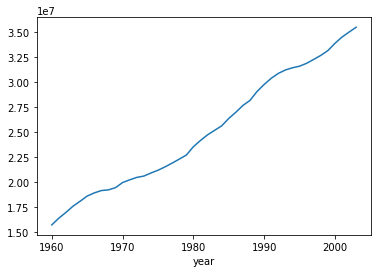

In [22]:
# Your code here . . .
#california_pop = ca_crimes.plot(y = 'pop', legend = None)
california_pop = crime_rates[crime_rates['state']=='California'].plot(x = 'year', y = 'pop', legend = None)